In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Presentation2/winequalityN.csv")

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].median())
data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].median())
data['citric acid'] = data['citric acid'].fillna(data['citric acid'].median())
data['residual sugar'] = data['residual sugar'].fillna(data['residual sugar'].median())
data['chlorides'] = data['chlorides'].fillna(data['chlorides'].median())
data['pH'] = data['pH'].fillna(data['pH'].median())
data['sulphates'] = data['sulphates'].fillna(data['sulphates'].median())

In [6]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

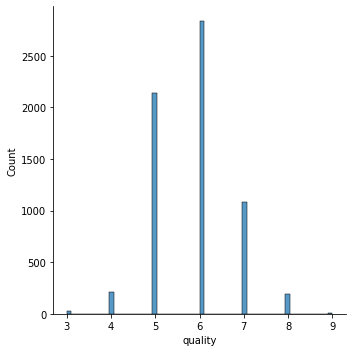

In [7]:
sns.displot(data['quality'])

In [8]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [9]:
data = pd.get_dummies(data[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']], drop_first = True)

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [11]:
X = data.drop("quality", axis = 1)
y = data.quality

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = .1)

In [15]:
grd_clf.fit(X_train, y_train)
grd_clf.score(X_test, y_test)

0.6205128205128205

### Ignore this. I was trying to see if I could do it and it did not work

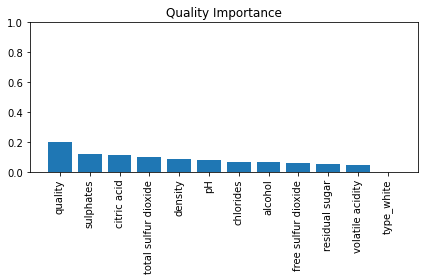

In [16]:
feature_importance = grd_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure()
plt.title("Quality Importance")
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx])

plt.xticks(range(X_train.shape[1]), data.columns[1:][sorted_idx], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0,1])

plt.tight_layout()
plt.show()

In [17]:
y_pred_grd = grd_clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_grd)


array([[  0,   2,   2,   7,   1,   0,   0],
       [  0,  13,  32,  18,   3,   0,   0],
       [  1,  12, 432, 197,  12,   1,   0],
       [  2,   5, 147, 587,  77,   5,   0],
       [  0,   0,  13, 163, 152,   3,   0],
       [  0,   0,   0,  21,  15,  26,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [18]:
print(classification_report(y_test, y_pred_grd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.41      0.20      0.27        66
           5       0.69      0.66      0.67       655
           6       0.59      0.71      0.65       823
           7       0.58      0.46      0.51       331
           8       0.74      0.42      0.54        62
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1950
   macro avg       0.43      0.35      0.38      1950
weighted avg       0.62      0.62      0.61      1950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
